In [1]:
# from google.colab import files
# upload = files.upload()

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm 
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
def plot(colormap1, colormap2, title1, title2):
    plt.figure(figsize = (14, 7))
    plt.subplot(1, 2, 1)
    plt.scatter(x.Petal_length, x.Petal_width, c=colormap1, s=40)
    plt.title(title1)
    plt.subplot(1, 2, 2)
    plt.scatter(x.Petal_length, x.Petal_width, c = colormap2, s=40)
    plt.title(title2)
    plt.show()

In [4]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
colormap = np.array(['red', 'lime', 'black'])


Text(0.5, 1.0, 'Petal')

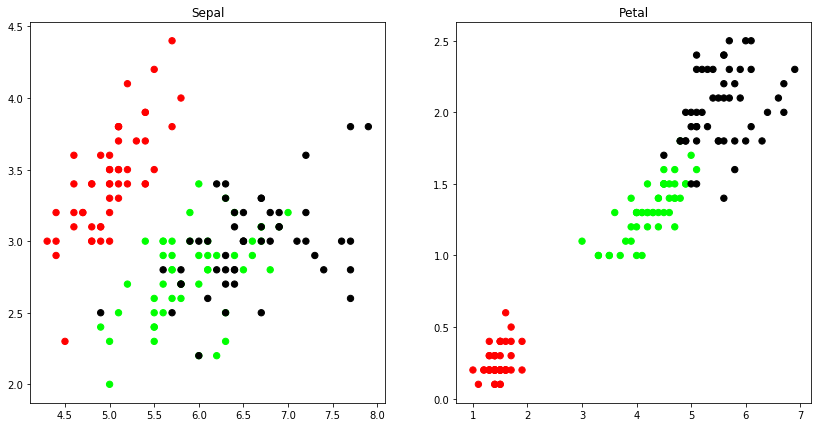

In [5]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_length, x.Sepal_width, c = colormap[y.Targets], s=40)
plt.title('Sepal')
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_length, x.Petal_width, c = colormap[y.Targets], s=40)
plt.title('Petal')

In [6]:
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


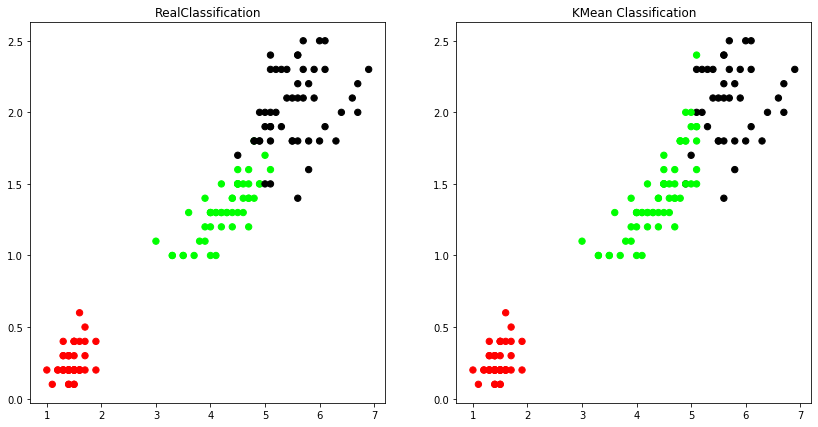

In [7]:
c1 = colormap[y.Targets]
c2 = colormap[model.labels_]
plot(c1, c2, 'RealClassification', 'KMean Classification')

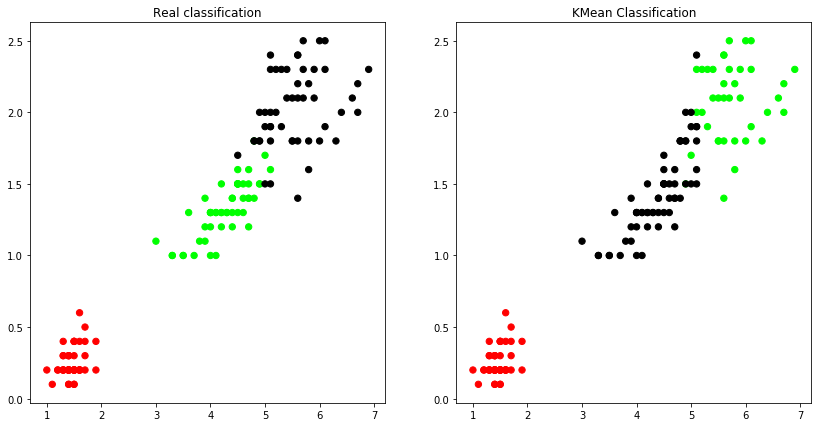

In [8]:
model.labels_ = np.choose(model.labels_, [0, 2, 1]).astype(np.int64)
c1 = colormap[y.Targets]
c2 = colormap[model.labels_]
plot(c1, c2, 'Real classification', 'KMean Classification')

In [10]:
print(sm.accuracy_score(y, model.labels_))
print(sm.confusion_matrix(y, model.labels_))

0.44
[[50  0  0]
 [ 0  2 48]
 [ 0 36 14]]


In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)
print("\n", xs.sample(5))


      Sepal_length  Sepal_width  Petal_length  Petal_width
139      1.280340     0.098217      0.933271     1.185567
53      -0.416010    -1.743357      0.137547     0.132510
88      -0.294842    -0.131979      0.194384     0.132510
80      -0.416010    -1.513160      0.023872    -0.130755
9       -1.143017     0.098217     -1.283389    -1.447076


In [12]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
yPred = gmm.predict(xs)

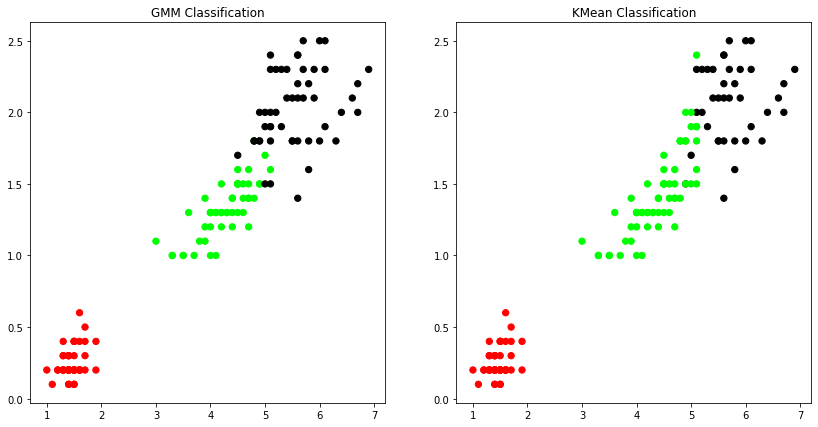

In [13]:
yPred = np.choose(model.labels_, [0, 2, 1]).astype(np.int64)
c2 = colormap[yPred]
plot(c1, c2, 'GMM Classification', 'KMean Classification')

In [14]:
print(sm.accuracy_score(y, yPred))
print(sm.confusion_matrix(y, yPred))

0.8933333333333333
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
